In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:

customers = pd.read_csv("Wholesale customers data.csv")

In [2]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


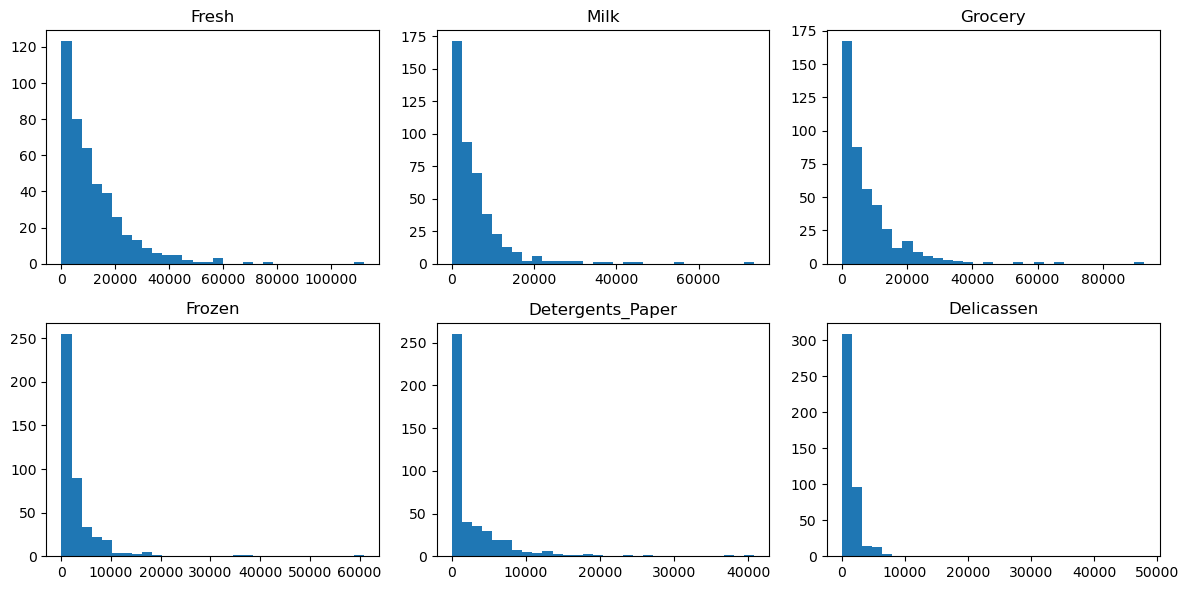

In [7]:
features = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]

fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes = axes.ravel()
for i, col in enumerate(features):
    axes[i].hist(customers[col], bins=30)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

Boxplots (outliers at a glance)

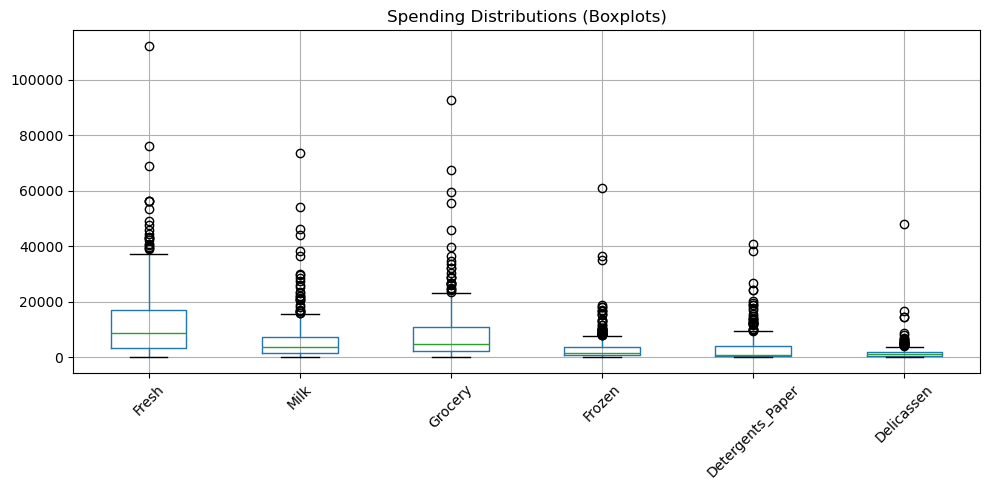

In [8]:
plt.figure(figsize=(10,5))
customers[features].boxplot(rot=45)
plt.title("Spending Distributions (Boxplots)")
plt.tight_layout()
plt.show()

Correlation heatmap (which categories move together?)

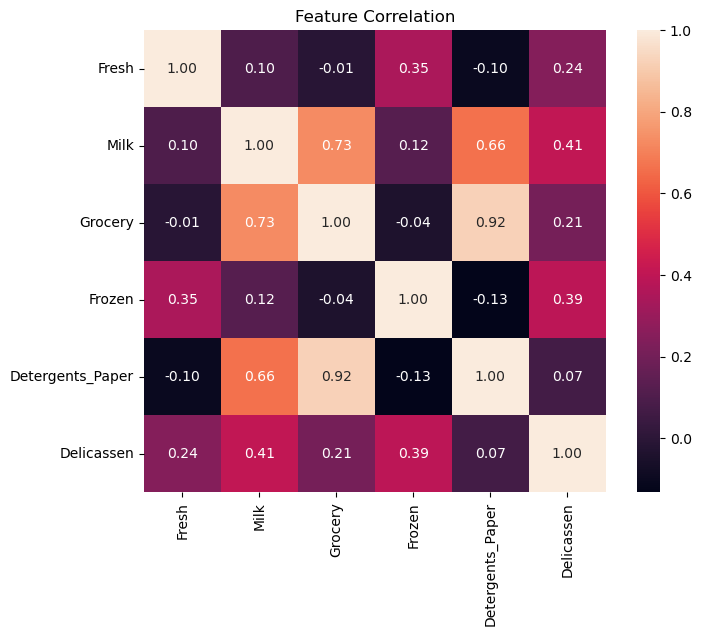

In [9]:
plt.figure(figsize=(8,6))
corr = customers[features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Feature Correlation")
plt.show()

In [13]:
features = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
X = customers[features] 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score

In [15]:
X_scaled = customers_scaled  

In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = km.fit_predict(X_scaled)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [25]:
customers["Cluster"] = labels
print(customers.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        1  
1        1776        1  
2        7844        1  
3        1788        1  
4        5185        1  


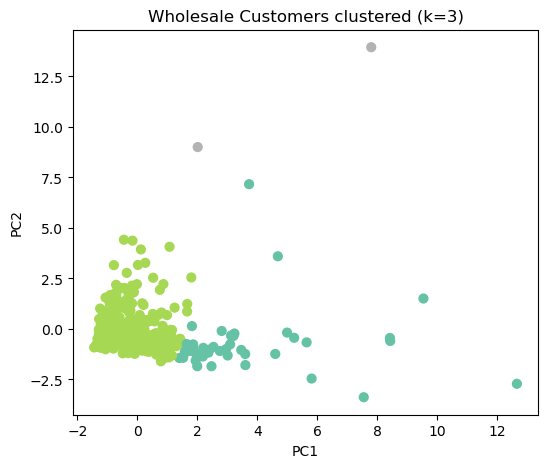

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="Set2", s=40)
plt.title("Wholesale Customers clustered (k=3)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()